## Convolutional Neural Network : Classification problem application

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

import my_cnn_app_utils as my

%matplotlib inline
np.random.seed(1)
print("TensorFlow version " + tf.__version__)

TensorFlow version 1.15.0


In [2]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 2


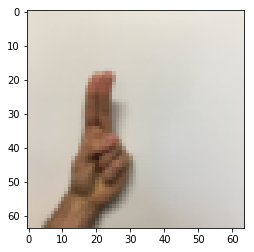

In [3]:
# Example of a picture
index = 10
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [5]:
X, Y = my.create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))


X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


In [6]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = my.initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1[1,1,1] = \n" + str(parameters["W1"].eval()[1,1,1]))
    print("W1.shape: " + str(parameters["W1"].shape))
    print("\n")
    print("W2[1,1,1] = \n" + str(parameters["W2"].eval()[1,1,1]))
    print("W2.shape: " + str(parameters["W2"].shape))



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1[1,1,1] = 
[ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W1.shape: (4, 4, 3, 8)


W2[1,1,1] = 
[-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]
W2.shape: (2, 2, 8, 16)


In [7]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = my.create_placeholders(64, 64, 3, 6)
    parameters = my.initialize_parameters()
    Z3 = my.forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = \n" + str(a))

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Z3 = 
[[ 1.4416982  -0.24909636  5.450499   -0.26189643 -0.20669901  1.3654672 ]
 [ 1.4070845  -0.02573219  5.08928    -0.48669913 -0.40940714  1.2624855 ]]


In [8]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = my.create_placeholders(64, 64, 3, 6)
    parameters = my.initialize_parameters()
    Z3 = my.forward_propagation(X, parameters)
    cost = my.compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,6)})
    print("cost = " + str(a))

cost = 4.6648703


Cost after epoch 0: 1.921332
Cost after epoch 5: 1.904156
Cost after epoch 10: 1.904309
Cost after epoch 15: 1.904477
Cost after epoch 20: 1.901876
Cost after epoch 25: 1.784077
Cost after epoch 30: 1.681053
Cost after epoch 35: 1.618208
Cost after epoch 40: 1.597973
Cost after epoch 45: 1.567264
Cost after epoch 50: 1.553831
Cost after epoch 55: 1.499270
Cost after epoch 60: 1.443608
Cost after epoch 65: 1.273833
Cost after epoch 70: 1.183315
Cost after epoch 75: 1.139723
Cost after epoch 80: 1.095345
Cost after epoch 85: 1.085024
Cost after epoch 90: 1.039502
Cost after epoch 95: 1.015570


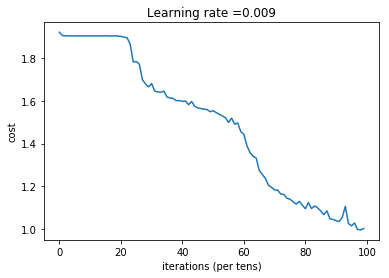

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.6638889
Test Accuracy: 0.5833333


In [9]:
_, _, parameters = my.model(X_train, Y_train, X_test, Y_test)